# Finding the Minimum of a Function

For an arbitrary continuous one-dimensional function $f(x)$, given a bracket of points $[a,b]$, this function will find the minimum of $f(x)$ in this bracket. The function will take the form `minimise(func,a,b,tol)`, where `func` is the arbitrary function, `a` and `b` are the beginning and end point of the bracket, and `tol` is the desired precision of the result.

The function will return the position of the minimum and the value of the function, i.e. $x_{min}$ and $f(x_{min})$.

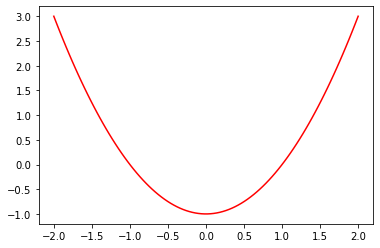

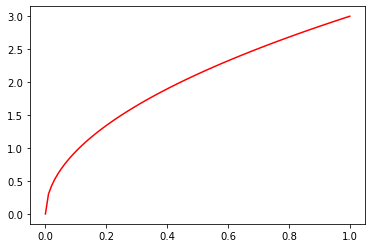

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Here one function
def myFunc1(x):
    return x**2-1
# Here is another
def myFunc2(x):
    return 3*x**0.5

# Here is a plotting function that takes
# an arbitrary function func as argument and plots it between a and b
def plotFunc(func,a,b):
    x = np.linspace(a,b,100)
    y = func(x)
    plt.figure()
    plt.plot(x,y,'r')

# Calling the plotting function for both of my functions
plotFunc(myFunc1,-2,2)
plotFunc(myFunc2,0,1)

### Pseudocode

- Starting from the bracket `[a,b]`, compute the midpoint between `a` and `b`, `m`.
- Define a new point `x` which is midway between `m` and `b`. If `f(x)>f(m)`, we can replace the bracket endpoint `b` by `x`. Else, we can replace the bracket start point `a` by `m`. 
- Recompute the new midpoint `m` from the new bracket `[a,b]`
- Repeat until the bracket width is below the tolerance

Things to verify:
- Make sure the code works.
- Does the code work even if there is no minimum between a and b? What is the correct output then?
- Since $f'(x)=0$ at the minimum so that around it, for $x=x_{min}+\epsilon$, we have $f(x) \approx f(x_{min}) + 0.5 \epsilon^2 f''(x_{min})$. Then the best tolerance is approximately $\sqrt{10^{-16}}=10^{-8}$. We will confirm this numerically.

In [5]:
def minimise(func,a,b,tol,verbose = True):
    delta = b - a
    while delta > tol:
        m = a + 0.5*delta
        gamma = b - m
        x = m + 0.5*gamma
        if func(x) > func(m):
            b = x
        else:
            a = m
        delta = b - a
    return m, func(m)

for i in range(0,16):
    print(i,':', (minimise(func,-2,2,1*10**-i)[1]))
    
# The output below shows that i = 8 is where f(x) stops converging, therefore 10**-8 is the best tolerance

0 : -0.7205056361674109
1 : -0.8882205030995388
2 : -0.8916398277196776
3 : -0.8916522794848977
4 : -0.8916524289298265
5 : -0.8916524309731397
6 : -0.8916524309803187
7 : -0.8916524309803517
8 : -0.8916524309803523
9 : -0.8916524309803522
10 : -0.8916524309803524
11 : -0.8916524309803523
12 : -0.8916524309803522
13 : -0.8916524309803523
14 : -0.8916524309803523
15 : -0.8916524309803522


In [2]:
# A simple function with a minimum at 1
def testfunc(x):
    return (x-1)**2

# Checking that your function finds it. Allowing for verbose option or its absence
try:
    x,fmin = minimise(testfunc,-2,2,1e-8,False)
except:
    x,fmin = minimise(testfunc,-2,2,1e-8)
print("Solutions: ", x,fmin)
assert(abs(x-1)<1e-8)
assert(abs(fmin)<1e-14)



Solutions:  0.9999999969876711 9.074125653862968e-18


Using the minimising function from part a, we will find all the minima of the function $f(x) = - (x-0.5)^2 e^{-x^2}$, and create a plot that shows:
- The function
- A colour marker for each minimum 
- A text label at each minimum with the values of $(x_{min},f(x_{min}))$

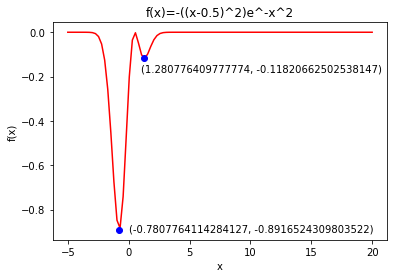

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    q = -(x-0.5)**2
    p = -x**2
    e = np.exp(1)
    y = q*(e**p)
    return y

def plotFunc(func,a,b):
    x = np.linspace(a,b,100)
    y = func(x)
    plt.figure()
    plt.text(0, -0.9, minimise(func,-2.5,0,1*10**-8))
    plt.text(1, -0.18, minimise(func,0.7,1.5,1*10**-8))
    plt.plot(x,y,'r')
    plt.title('f(x)=-((x-0.5)^2)e^-x^2')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.plot(-0.781,-0.892,'bo',)
    plt.plot(1.28,-0.118,'bo',)

plotFunc(func,-5,20)

### Two dimensional contour plot

We now create a two dimensional `plt.contourf` filled contour plot of the function
\begin{equation} f(x,y) = e^{-(x^2+y^2)}(x-0.5)(y-0.5). \end{equation}
Making sure that all minima and maxima of the function are clearly visible with sufficient resolution.

<ipython-input-4-9e695a61cf06>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(xmat, ymat, fmat, cmap='prism', vmin = -0.2, vmax = 0.6)


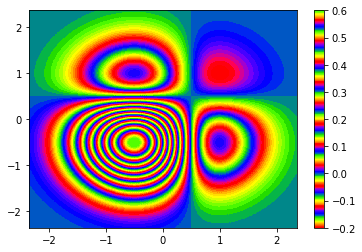

In [4]:
xvec = np.arange(-0.75*np.pi,0.75*np.pi,0.005)
yvec = np.arange(-0.75*np.pi,0.75*np.pi,0.005)
ymat,xmat = np.meshgrid(yvec,xvec)
fmat = np.exp(-(xmat**2+ymat**2))*(xmat-0.5)*(ymat-0.5)
plt.figure()
plt.pcolor(xmat, ymat, fmat, cmap='prism', vmin = -0.2, vmax = 0.6)
plt.colorbar()
plt.show()